In [1]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.models import load_model

To limit GPU Memory Usage

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


Make sure their is a GPU to train on

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Established a Pipeline from the disk to the GPU memory to since the size of the dataset is bigger 

In [4]:
PATH = "D:/GP/Dataset"
train_dir = os.path.join(PATH,'pretrain')
validation_dir = os.path.join(PATH, 'preval')

train_data = tf.keras.utils.image_dataset_from_directory(train_dir,image_size=(256, 256))



Found 240000 files belonging to 2 classes.


Color normalization 

In [5]:
train_data_scaled = train_data.map(lambda x, y: (x/255, y))


Take a batch of data to check for labels

In [6]:
t_data_iter = train_data_scaled.as_numpy_iterator()

In [7]:
t_batch = t_data_iter.next()

In [8]:
print(len(t_batch))

2


class 0 = violent 
class 1 = non Violent

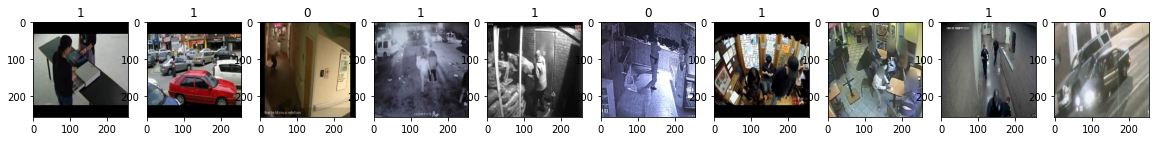

In [9]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for i, img in enumerate(t_batch[0][:10]):
    ax[i].imshow(img)
    ax[i].title.set_text(t_batch[1][i])


Checking if normalization worked

In [10]:
t_batch[0].min()

0.0

In [11]:
t_batch[0].max()

1.0

Split the Training data

In [12]:
train_split = train_data_scaled.take(int(len(train_data_scaled)*.7))
validation_split = train_data_scaled.take(int(len(train_data_scaled)*.3))

First Model

In [ ]:
# model = Sequential()
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())

# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

Second Model

In [ ]:
# model = Sequential()
# model.add(Conv2D(16, (9,9), 1, activation='relu', input_shape=(256,256,3)))
# model.add(BatchNormalization())

# model.add(Conv2D(32, (7,7), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(BatchNormalization())

# model.add(Conv2D(64, (5,5), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(BatchNormalization())

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))

# model.add(Dense(1, activation='sigmoid'))

Final Model

In [13]:
model = Sequential()
model.add(Conv2D(32, (9, 9), 1, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001),  input_shape=(320,320,3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (9, 9), 1, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, (9, 9), 1, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (9, 9), 1, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0003), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [15]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 312, 312, 32)      7808      
                                                                 
 batch_normalization (BatchN  (None, 312, 312, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 304, 304, 32)      82976     
                                                                 
 batch_normalization_1 (Batc  (None, 304, 304, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 152, 152, 32)     0         
 )                                                               
                                                        

In [17]:
LOGDIR = 'logs'

Declaring call backs to analyze model beauvoir, used for tweaking

In [18]:
tb_callbacks = tf.keras.callbacks.TensorBoard(log_dir=LOGDIR)

Training

In [18]:
history=model.fit(train_split, epochs=10, validation_data=validation_split , callbacks=[tb_callbacks])

Epoch 1/10
5250/5250 [==============================] - 4002s 762ms/step - loss: 0.0956 - accuracy: 0.9600 - val_loss: 0.0262 - val_accuracy: 0.9916
Epoch 2/10
5250/5250 [==============================] - 2326s 443ms/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0214 - val_accuracy: 0.9943
Epoch 3/10
5250/5250 [==============================] - 2325s 443ms/step - loss: 0.0120 - accuracy: 0.9966 - val_loss: 0.0123 - val_accuracy: 0.9960
Epoch 4/10
5250/5250 [==============================] - 3090s 589ms/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.0434 - val_accuracy: 0.9953
Epoch 5/10
5250/5250 [==============================] - 2707s 516ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0096 - val_accuracy: 0.9972
Epoch 6/10
5250/5250 [==============================] - 2319s 442ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0170 - val_accuracy: 0.9984
Epoch 7/10
5250/5250 [==============================] - 2316s 441ms/step - loss: 0.0043 - accuracy: 0.9989

Plotting Loss

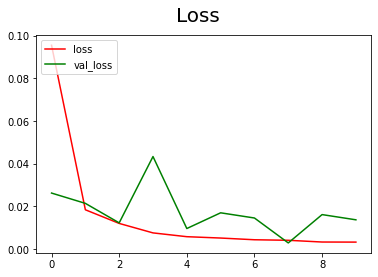

In [19]:
fig = plt.figure()
plt.plot(history.history['loss'],color='red', label='loss')
plt.plot(history.history['val_loss'],color='green', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

Plotting accuracy 

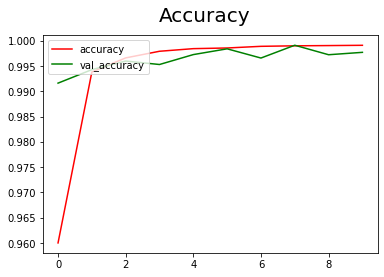

In [20]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='red', label='accuracy')
plt.plot(history.history['val_accuracy'],color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

Saving Model

In [27]:
model.save(os.path.join('model','ABCS.h5'))